In [7]:
import numpy as np
import pandas as pd
import scipy.special
import matplotlib.pyplot as plt

C:\Users\grego\AppData\Local\Temp\ipykernel_24840\2052255949.py:3: RuntimeWarning: invalid value encountered in divide
  f=(2*scipy.special.jv(1, r)/r)**2


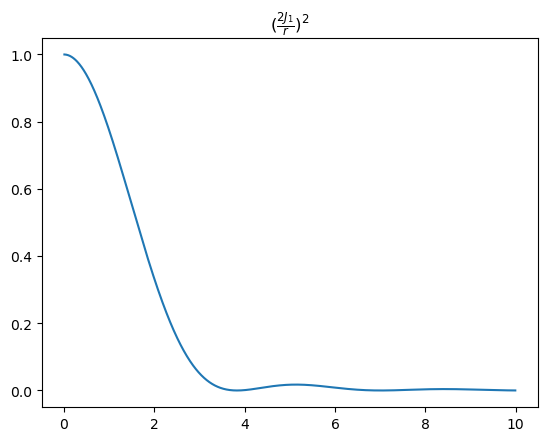

Text(0.5, 1.0, 'min(f, 0.1)')

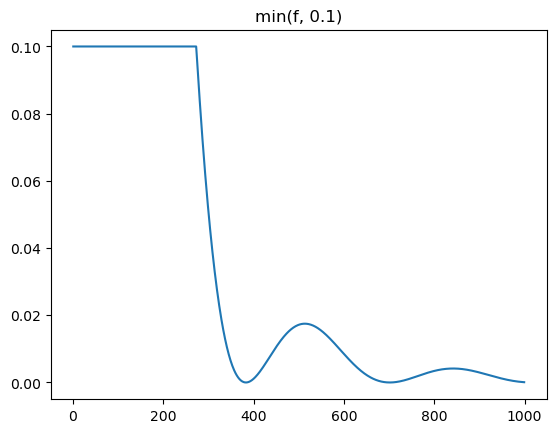

In [16]:
r=np.arange(0, 10, 0.01)

f=(2*scipy.special.jv(1, r)/r)**2

plt.plot(r,f)
plt.title(r'$(\frac{2 J_1 }{r})^2$')
plt.show()
f_min=np.array([min(f[i], 0.1) for i in range(len(f))])
plt.plot(f_min)
plt.title('min(f, 0.1)')

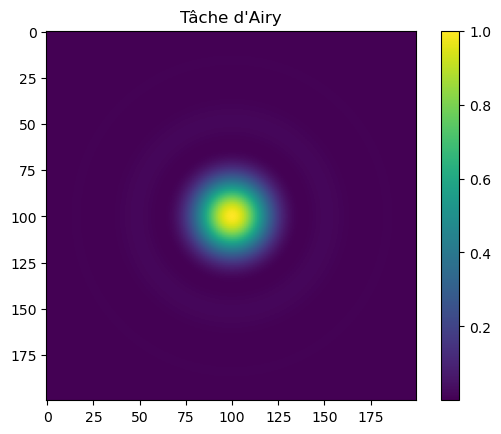

In [24]:
x=np.arange(-10, 10, 0.1)
y=np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)  # meshgrid fait deux grilles de coordonnées, une avce les colonnes constantes et l'autre avec les lignes constantes. cela permet d'avoir une fonction 2D de X et Y en écrivant directement F(X,Y)
R = np.sqrt(X**2 + Y**2)
F = (2*scipy.special.jv(1, R)/R)**2
plt.imshow(F)
plt.colorbar()
plt.title("Tâche d'Airy")
plt.show()
 



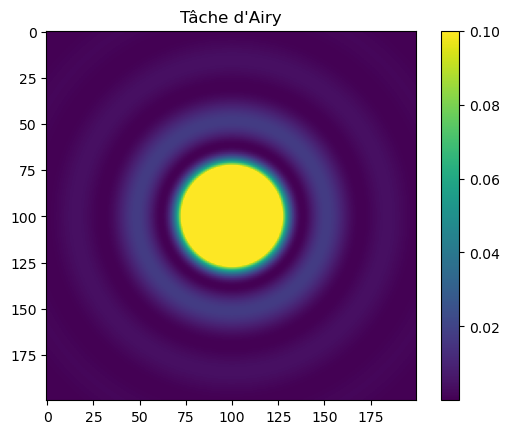

In [30]:
x=np.arange(-10, 10, 0.1)
y=np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)  # meshgrid fait deux grilles de coordonnées, une avce les colonnes constantes et l'autre avec les lignes constantes. cela permet d'avoir une fonction 2D de X et Y en écrivant directement F(X,Y)
R = np.sqrt(X**2 + Y**2)
F = (2*scipy.special.jv(1, R)/R)**2
plt.imshow(F, vmax=0.1) # avec saturation
plt.colorbar()
plt.title("Tâche d'Airy")
plt.show()
 

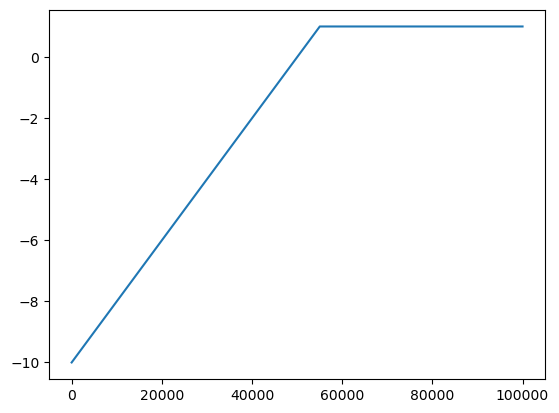

In [164]:
plt.plot([min(1, x[i]) for i in range(len(x))])

C:\Users\grego\AppData\Local\Temp\ipykernel_24840\1893022213.py:13: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(xi) - xi*np.sqrt(1-xi**2)
C:\Users\grego\AppData\Local\Temp\ipykernel_24840\1893022213.py:13: RuntimeWarning: invalid value encountered in sqrt
  return np.arccos(xi) - xi*np.sqrt(1-xi**2)


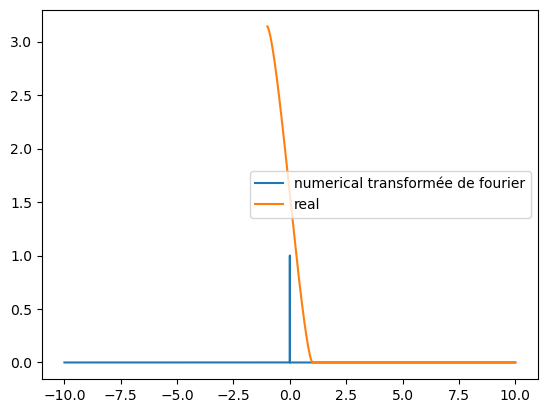

In [188]:
def airy(r): 
    return np.where(r != 0, (2 * scipy.special.jv(1, r) / r)**2, 1.0)

%matplotlib inline
x = np.linspace(-10 , 10, 100000)

y=airy(x)

fourier=np.fft.fft(y)
fourier=np.fft.fftshift(fourier)
plt.plot(x, np.abs(fourier)/max(np.abs(fourier)), label='numerical transformée de fourier')
def k_th(xi): 
    return np.arccos(xi) - xi*np.sqrt(1-xi**2)

plt.plot(x, k_th(np.array([min(1, x[i]) for i in range(len(x))])) , label='real')
plt.legend()

plt.show()

Text(0.5, 1.0, "FFT de la tâche d'Airy")

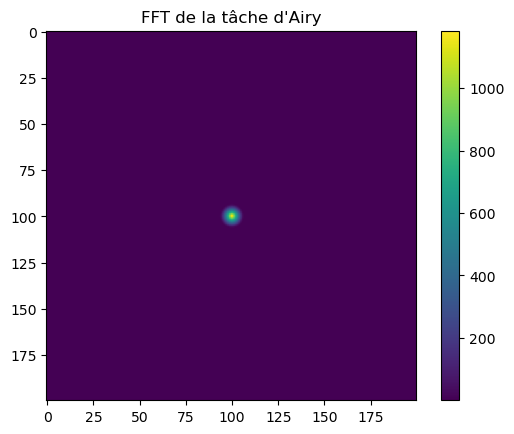

In [155]:
fourier_2D=np.fft.fft2(F)
fourier_2D=np.fft.fftshift(fourier_2D)
plt.imshow(np.abs(fourier_2D))
plt.colorbar()
plt.title("FFT de la tâche d'Airy")

Text(0.5, 1.0, "FFT de la tâche d'Airy avec saturation")

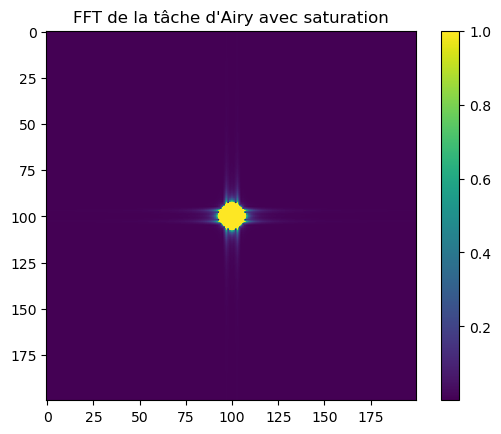

In [156]:
fourier_2D=np.fft.fft2(F)
fourier_2D=np.fft.fftshift(fourier_2D)
plt.imshow(np.abs(fourier_2D), vmax=1)
plt.colorbar()
plt.title("FFT de la tâche d'Airy avec saturation")

In [94]:
def derive(x): 
    return np.array([x[i+1]-x[i] for i in range(len(x)-1)])

In [97]:
def find_maxima(x, y ): 
    res=[]
    for i in range(1, len(y) - 1 ):
        if y[i] >y[i-1] and y[i] > y[i+1]: 
            res.append(x[i])
    return res


C:\Users\grego\AppData\Local\Temp\ipykernel_24840\1865238946.py:2: RuntimeWarning: invalid value encountered in divide
  return np.where(r != 0, (2 * scipy.special.jv(1, r) / r)**2, 1.0)


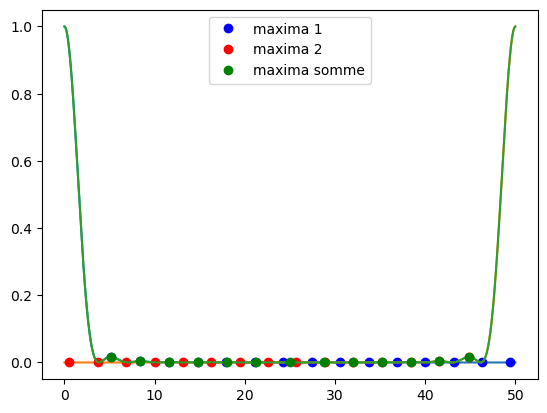

In [147]:
dist=50
r=np.arange(0, dist, 0.01)
plt.plot(r, airy(r))
plt.plot(find_maxima(r, airy(r)), airy(find_maxima(r, airy(r))), 'bo', label='maxima 1')
plt.plot(r, airy(dist-r))
plt.plot(find_maxima(r, airy(dist-r)), airy(dist-np.array(find_maxima(r, airy(dist-r)))), 'ro', label='maxima 2')
sum=airy(r)+airy(dist-r)
plt.plot(r, sum)
array_of_maximas = np.array(find_maxima(r, sum))
somme=airy(array_of_maximas)+airy(dist-array_of_maximas)
plt.plot(array_of_maximas, somme, 'go', label='maxima somme')
plt.legend()